# Part 3

In [195]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
np.random.seed(5432)

In [216]:
def compute_W(datas):
    assert(len(datas) > 0)
    shape = np.shape(datas[0])

    W = datas[0] @ np.transpose(datas[0])
    for i in range(1, len(datas)):
        assert(np.shape(datas[i]) == shape)
        W += datas[i] @ np.transpose(datas[i])
    return W / shape[0]

def simulate(W, initial_pattern = None, sigma = 0.1, output_file: str = None):
    if initial_pattern is None:
        initial_pattern = np.random.choice([-1, 1], size=np.shape(W)[0])

    def f(t, y):
        return -y + np.sign(W @ y) + sigma * np.random.normal()
    sol = solve_ivp(f, [0, 1.5], initial_pattern, dense_output=True)
    t = np.linspace(0, 1.5, 12)

    fig = plt.figure()
    gs = fig.add_gridspec(nrows=4, ncols=3, hspace=0.4, wspace=0.1)
    axarr = gs.subplots(sharex=True, sharey=True)

    sol = sol.sol(t)
    for i in range(len(t)):
        axarr[i // 3][i % 3].imshow(np.reshape(sol[:,i], (16, 16)))
        axarr[i // 3][i % 3].set_title("t = {:.2f}".format(t[i]))

    if output_file is not None:
        plt.savefig(output_file)
    plt.show()

## Question 1: Invent a pattern

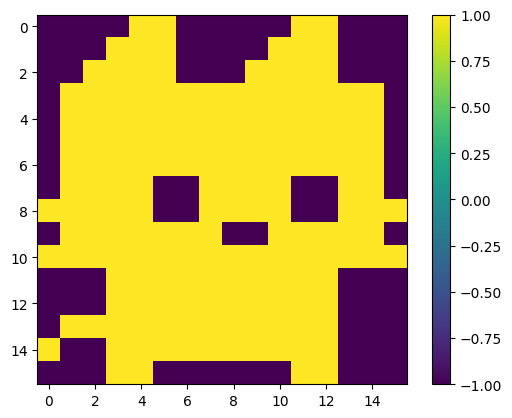

In [197]:
with Image.open("cat.png") as im:
    im = im.convert('1')
    data = np.array(im) * 2 - 1

plt.imshow(data)
plt.colorbar()
plt.savefig("figures/part3_cat.svg")
plt.show()

data = np.reshape(data, (256, 1))

## Question 2: Plot the matrix W and simulate

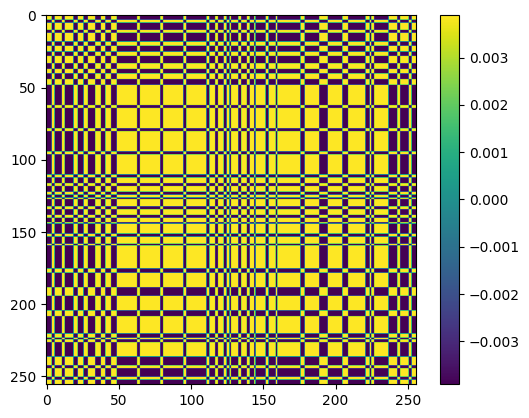

In [198]:
W = compute_W([data])
plt.imshow(W)
plt.colorbar()
plt.savefig("figures/part3_mat_w_cat.svg")
plt.show()

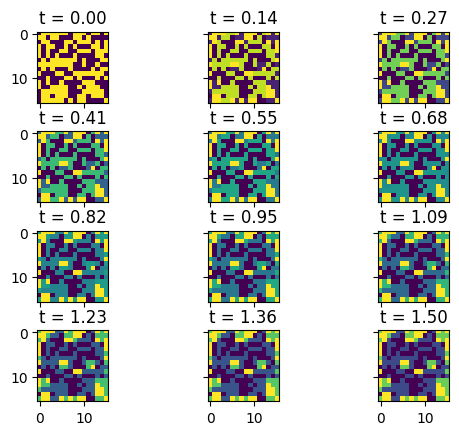

In [199]:
simulate(W, output_file="figures/part3_cat_simulation.svg")

## Question 3

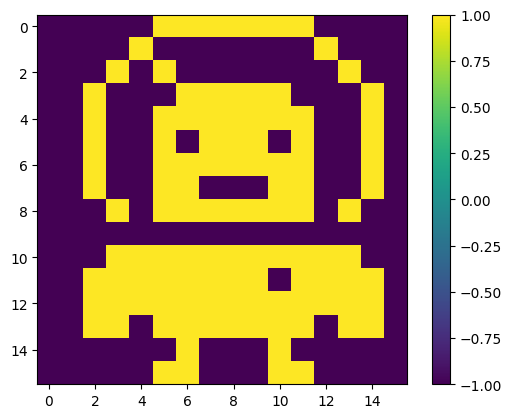

In [200]:
with Image.open("man.png") as im:
    im = im.convert('1')
    data2 = np.array(im) * 2 - 1

plt.imshow(data2)
plt.colorbar()
plt.savefig("figures/part3_man.svg")
plt.show()

data2 = np.reshape(data2, (256, 1))

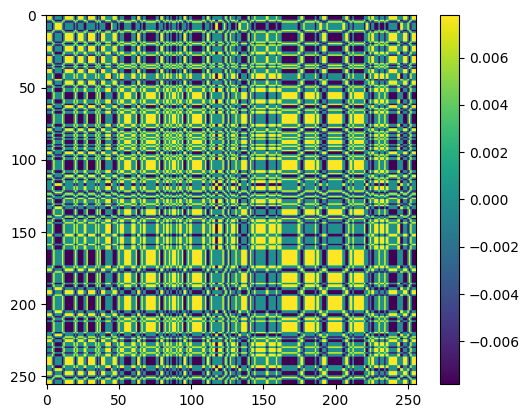

In [201]:
W = compute_W([data, data2])
plt.imshow(W)
plt.colorbar()
plt.savefig("figures/part3_mat_w_cat_man.svg")
plt.show()

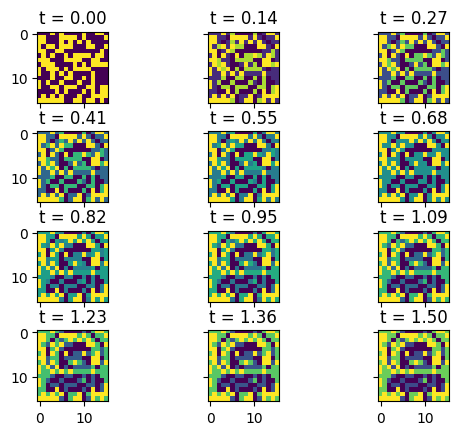

In [202]:
np.random.seed(2000)
simulate(W, output_file="figures/part3_man_simulation.svg")

## Question 4: Recover corrupted pattern

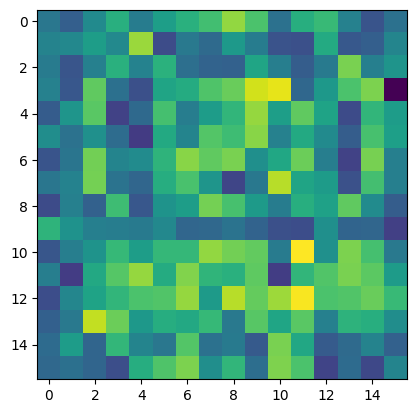

In [203]:
np.random.seed(3995)
sigma = 0.8
corrupted_pattern = data2.astype('float64')
corrupted_pattern += sigma * np.random.normal(size=np.shape(corrupted_pattern))

plt.imshow(np.reshape(corrupted_pattern, (16, 16)))
plt.savefig("figures/part3_man_corrupted.svg")
plt.show()

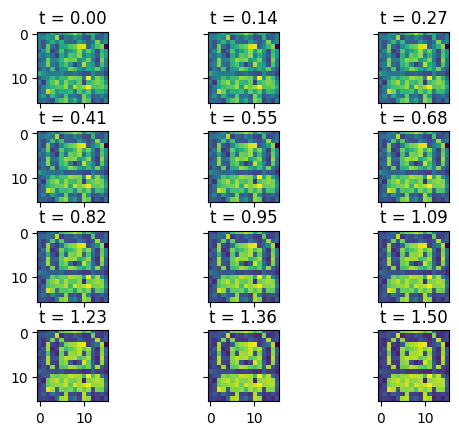

In [204]:
initial_pattern = np.reshape(corrupted_pattern, (1, np.shape(corrupted_pattern)[0]))[0]
simulate(W, initial_pattern, output_file="figures/part3_man_corrupted_simulation.svg")

## Question 6

In [205]:
import random

In [243]:
def simulate(W, initial_pattern, sigma = 0.1):
    def f(t, y):
        return -y + np.sign(W @ y) + sigma * np.random.normal()
    sol = solve_ivp(f, [0, 3], initial_pattern, dense_output=True)
    return sol.sol(0.5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


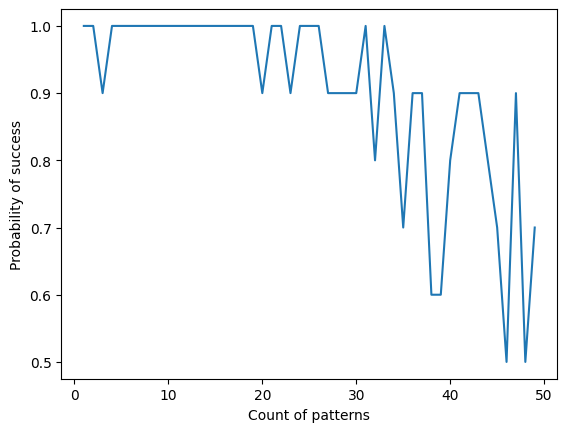

In [275]:
w = 16
d = w * w

def generatePattern():
    return np.random.choice([-1, 1], (d, 1))

def generatePatterns(n):
    return [generatePattern() for _ in range(n)]

def corruptPattern(p):
    sigma = 0.4
    p = p.astype('float64')
    return p + sigma * np.random.normal(size=np.shape(p))

values = []
for k in range(1, 50):
    print(k)
    patterns = generatePatterns(k)
    W = compute_W(patterns)

    n_tests = 10
    success = 0
    for _ in range(n_tests):
        i = random.randint(0, len(patterns) - 1)
        p = patterns[i]
        corrupted_p = corruptPattern(p)
        result = np.sign(simulate(W, np.reshape(corrupted_p, (1, d))[0]))
        if np.linalg.norm(np.reshape(result, np.shape(p)) - p) < 1:
            success += 1

    values.append(success / n_tests)

plt.plot(range(1, len(values) + 1), values)
plt.xlabel("Count of patterns")
plt.ylabel("Probability of success")
plt.savefig("figures/part3_capacity_N=256.svg")
plt.show()